**<font size=48>Lab Enchancement 2</font>**<br>

By Lim Sir Yuean and Yap Jack

Learning objectives:
- Understand the role of mathematics and statistics in training Machine Learning Models.
- Explore a few advanced methods in training more capable Machine Learning Models

References:
- https://www.techtarget.com/searchenterpriseai/definition/data-splitting#:~:text=Data%20should%20be%20split%20so,optimal%20for%20small%20data%20sets.
- https://www.linkedin.com/pulse/regression-error-metrics-mahesh-babu-r/
- https://www.kaggle.com/code/dansbecker/model-validation
- https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
- https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html

<b>Foreword:</b>

*Please complete Lab 1 before entering Lab 2 for better understanding!*

This lab will explore the use of other Machine Learning Algorithms and how Machine Learning Models can be trained for more applications such as computer vision.

<b>Why?</b>
- To do more with what you already know.
- To understand the potential of solving real-life problems with Machine Learning Models.

## <font color='lightblue'>Mathematics and Statistics in Machine Learning</font>

To develop more competent machine learning models, a solid understanding of mathematical and statistical principles is important.

In this section, we will use the synthetic housing prices dataset from the previous lab to demonstate a few applications from mathematics and statistics in machine learning.

In [3]:
# Previous model in lab 1
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

file_path = "Housing_prices_train_syn.csv"
home_data = pd.read_csv(file_path)

feature_names = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
X = home_data[feature_names]

prediction_target = ["SalePrice"]
y = home_data[prediction_target]

model_1 = DecisionTreeRegressor(random_state=1)
model_1.fit(X, y)

DecisionTreeRegressor(random_state=1)

<font size = 5 color='lightgreen'>Model Validation</font>

To accurately validate your model, we will use Mean Absolute Error, a formula from statistics to calculate the difference between actual (observed) and predicted values.

For each house:

    Error = Actual - Predicted
    
For every house:

    Error = (Actual - Predicted) / Number of houses

<div style="text-align:center">
    <img src="Screenshot 2024-05-12 115528.png" width="700">
</div>

<b>How is this formula useful?</b>

To compare and evaluate the accuracy of machine learning models.

Besides lab 1, there are many training methods to create a very intelligent Machine Learning Model. This formula is a good way to measure which works.


<u><b>Why does it matter?</b></u>

To apply Machine Learning Model to real-world issues, the model must handle unknown and different datasets than our own. 

<div style="text-align: center;">
    <span style="font-family: 'Times New Roman', Times, serif;">"Not every house on Earth is identical, yet neither are they entirely different"</span>
</div>

Our dataset does not represent houses on the entire earth, but only a tiny fraction (sample) of it.

Our job is to train our model good enough to recognize this important detail and accurately recognize newer data in the future, especially when applying it in real-life issues.

<font size = 4 color='lightskyblue'>Code in action</font>

    Splitting data:
        Excluding a portion of data from the model to evaluate how accurate it can predict without them.


Comparing prediction from "train" to "val" by splitting the data with a 80-20 or a 70-30 ratio depending on the dataset. 

In [4]:
# Step 1: Import library
from sklearn.model_selection import train_test_split

# Step 2: Split the traning data
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 1)

In [5]:
# Step 3: Fit the data
model_2 = DecisionTreeRegressor()
model_2.fit(train_X, train_y)

# Step 4: Predict with the chosen algorithm
predict_split = model_2.predict(val_X)


In [6]:
# Step 5: Compare predicted values with validation values
# Convert array to a column
predict_split = pd.DataFrame(predict_split, columns=['Predicted'])

print(predict_split)
print(val_y)

     Predicted
0     186500.0
1     184000.0
2     130000.0
3      92000.0
4     170000.0
..         ...
360   134000.0
361   183900.0
362   148500.0
363   285000.0
364   195000.0

[365 rows x 1 columns]
      SalePrice
258      231500
267      179500
288      122000
649       84500
1233     142000
...         ...
1017     187500
534      178000
1334     125000
1369     232000
628      135000

[365 rows x 1 columns]


As you can see, the comparison between the output of training data and validation data has a significant difference in their values. 

Hence, we can apply the MAE formula to find the error. "val_y" is the actual value and "train_X" is the predicting value.

In [7]:
from sklearn.metrics import mean_absolute_error

val_mae = mean_absolute_error(val_y, predict_split)
print(val_mae)

model_2_with_split = val_mae

28753.04109589041


<font size = 4 color='lightskyblue'>We got the value for applying MAE, what now?</font>

    Compare the MAE from two models: 
        a basic model and a model that did data splitting. 

The real value of a Machine Learning Model is its ability to predict outcomes based on new or unknown data. Splitting the data has allowed us to examine this performance criteria.

Thus, we compare both models to determine their effectiveness.

In [8]:
# Calculate baseline model without data split
from sklearn.metrics import mean_absolute_error
baseline = model_2.predict(X)

model_2_no_split = mean_absolute_error(y, baseline)
model_2_no_split

7234.652968036529

In [9]:
MAE_comparison = model_2_with_split - model_2_no_split
MAE_comparison 

21518.388127853883

<font size = 4 color='lightskyblue'>Interpret the output</font>



    In-sample score: no splitting data

    Out-of-sample score: splitted data

Since our dataset does not represent houses from the whole world, inconsistencies in the dataset is unavoidable. 

For example, if 10% of houses in the dataset coincidently have the same green door, the model will follow this pattern, applying it to every houses it sees. 

Hence, we compare the 2 models to see how severe this difference is.


______

As shown above, the difference of mean absolute data between the 2 models is about $23,000.

The MAE for in-sample data is about $7500

The MAE for out-of-sample data is about $30,000

In [10]:
home_data["SalePrice"].isnull().sum()

0

In [11]:
avg_home_price = home_data["SalePrice"].mean()
avg_home_price

180921.19589041095

As a point of reference, the average home price in the dataset is about $181,000.

Comparing the two scores to this benchmark, the out-of-sample model is not yet accurate with an error rate of approximately 16.57% and a difference of $151,000.

    (30,000 / 181,000) * 100 = 16.57%
    181,000 - 30,000 = 151,000

In [12]:
x = (30000 / 181000) * 100
print(x)
y = 181000 - 30000
print(y)

16.574585635359114
151000


<font size = 4 color='lightskyblue'>Concluding Insights</font>

Although the accuracy out-of-sample model is lower than in-sample model due to a higher error rating, its training method is still far better for practical purposes.

To improve the out-of-sample model, we should conduct "feature engineering" by picking and sorting other relevant features to improve the model's accuracy.


<font size = 4 color='lightgreen'>More Model Validation Methods?</font>

Aside from this, a calculus concept can also be applied to validate Machine Learning Models.

<div style="text-align: left;">
    <span style="font-family: 'Times New Roman', Times, serif;">"Y = f(X)"</span>
</div>

Y = output variable | f() = target function | X = input variable


<b>How is this formula useful?</b>

This formula represents a continuous function (a straight line) that computes the amount of data given. 

In Machine Learning, we can use this calculus concept to validate our model by comparing different outputs (Y) from each training and configure inputs (X).

This concept also allows us to optimize the model with the results.

<div style="text-align:center">
    <img src="Screenshot 2024-05-14 101101.png" width="700">
</div>


Since we can split the data for training and validating purposes, we will have at least 2 lines (functions) on a graph. 

*Note: MAE is the distance between the validation curve and training curve.*

<div style="text-align:center">
    <img src="Screenshot 2024-05-14 102355.png" width="700">
</div>

<b>What is Underfitting and Overfitting?</b>

    Overfitting:
        When the model strictly follows your dataset.
*Capturing spurious patterns that won't recur in the future, making less accurate predictions.*

    Underfitting:
        When the model follows loosely on your dataset.
*Not capturing patterns enough to make accurate predictions.*



<div style="text-align:center">
    <img src="Screenshot 2024-05-12 123511.png" width="700">
</div>

As mentioned before, our goal is to train a machine learning model to predict future unknown data accurately. This goal is called "Generalization" in machine learning. 

Generalization is how well a machine learning model learns and generalize new data. We use overfitting and underfitting to evaluate this criteria.


<font size = 4 color='lightyellow'>Code in action</font>

Here, we will run a few overfitting and underfitting tests to train the best model.

In [19]:
# Step 1: Create a helper function to get MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [37]:
# Step 2: Create different sizes to testing
test_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

# Step 3: Loop the set sizes to find the ideal fit
# Implicit loop
scores = {}
for leaf_size in test_max_leaf_nodes:
    mae = get_mae(leaf_size, train_X, val_X, train_y, val_y)
    scores[leaf_size] = mae

best_tree_size = min(scores, key = scores.get)

# Step 4: Examine the results
print("MAE for each size tests: ", scores)
best_tree_size 
# Explicit loop (advanced)
# scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in test_max_leaf_nodes}
# best_tree_size = min(scores, key = scores.get)

MAE for each size tests:  {5: 35044.51299744237, 25: 29016.41319191076, 50: 27405.930473214907, 100: 27282.50803885739, 250: 27893.822225701646, 500: 29454.18598068598}


100

As you can see above, each sizes have varying error ratings. We will pick the best tree size with the least errors for training

Logically speaking we should train the one with the least errors, but in practice, we make it more accurate by training the entire sizes since it already includes our validation data.

In [57]:
# Step 5: Fit the best size with the least errors with a new model
import numpy as np
calc_concept_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 1)

file_path = "Housing_prices_train_syn.csv"
home_data = pd.read_csv(file_path)

feature_names = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
X = home_data[feature_names]

prediction_target = ["SalePrice"]
y = home_data[prediction_target]



calc_concept_model.fit(X,y)


DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

🎉 Congratulations! You just applied mathematics and statistics concepts to make a better model than lab 1!

## <font color='lightpink'>Computer Vision with Machine Learning</font>

Computer Vision is a subset of machine learning, build for computers to capture patterns based on videos and digital images, advancing from the numerical data we're familiar with.

For the fun part, we will now train a basic model for image segmentation, an important computer vision technique that helps computer to recognize visual patterns.

<font size = 5 color='yellow'>Image Segmentation</font>

<b>What is image segmentation?</b>

Image segmentation breaks down digital images into smaller regions, making it easier to analyze specific objects or areas. It can be used for applications, such as:
- Object Detection and Recognition
- Image Compression
- Image Editing and Enhancement
- Image Analysis

<b>How does it work?</b>

Image segmentation works by recognizing features such as position of edges, most frequent colours, and size of the image as data. 

The algorithm will use the data to predict its target prediction, thus recognizing different aspects of an image. For example, allowing the computer to differentiate between an apple and a banana in an image.


<b>Applications in real life?</b>

Image recognition is used in many modern technologies, including:
- Healthcare: Analyze medical imaging scans such as X-rays detect abnormalities.
- Retail: Stock checks and item recognition.
- Facial recognition: Device security and identity verification.
- Factories: Detect defective products.
- Surveillance: Crime detection and safety notifying measures.

This is technique enables faster and more advanced method of image processing.

<font size = 4 color='lightskyblue'>Code in action</font>

Here we will be using the Kmeans algorithm from sklearn to train our image segmentation model with matplotlib to plot how it works.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

<font size = 5 color='lightblue'>Recognising colours in 3D space!</font>

To demo how image segmentation recognize colours, we will use an image with 3 main colours and plot the data using Matplotlib.

This shows us how an image is being seen by the machine learning algorithm.

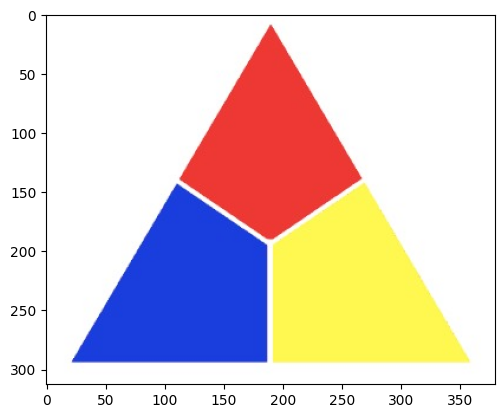

In [7]:
img = cv2.imread("tri.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)

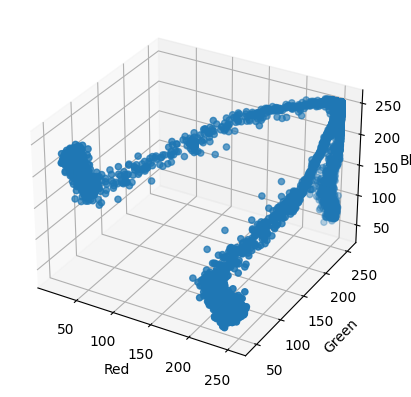

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Split the image into its RGB components
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Adding subplot with 3D projection
ax.scatter(r, g, b)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

As you can see, the plotted data in a 3-D graph shows how the computer vision generally recognizes data from an image. 

You can observe the clusters from each end of the data with x, y, and z in a 3-D space, indicating concentrated colours in an image due to its higher pixel count.

If the data points are clustered, it means some places in a graph are more dense, which we can think as different color dominance on the image.

<font size = 5 color='lightblue'>Image Segmentation</font>

Now that you know how it works, we can perform the image segmentation technique on a complex image with multiple colour shemes, density, and edges.

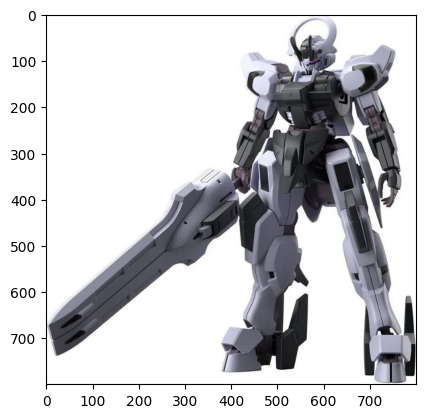

In [10]:
image = mpl.image.imread("Schwarzette.jpg")
plt.imshow(image)


image.shape returns a tuple containing three elements: (height, width, channels).
Therefore, this image has a height of 800 pixels, a width of 800 pixels, a color channels of 3.

In [11]:
# Step 1: Evaluate the image
image.shape

(800, 800, 3)

Restructure the image data into a 2D array, using '-1' as one of the dimensions in our reshaping operation and '3' indicating that each row in our reshaped data will contain three elements (red, green, blue color channels).

In [12]:
# Step 2: Reshape the data into a 2-D array
X = image.reshape(-1, 3)
X.shape

(640000, 3)

Initializing a K-means clustering algorithm with 3 clusters and 10 iterations of centroid initialization, enabling effective grouping of data points into distinct clusters, followed by training the model on the data matrix X.

In [13]:
# Step 3: Initialize Kmean algorithm
kmeans = KMeans(n_clusters = 3, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

The code generates a segmented image by assigning each pixel to its corresponding cluster center and then reshaping it back to the original image shape.

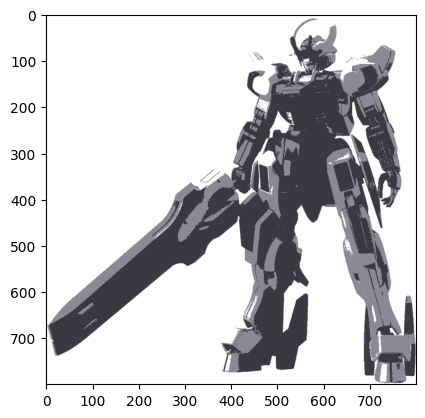

In [15]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img / 255)

The image above is how our ML model recognizes the image from its point of view.

🎉 Congratulations! You just train an image segmentation model using K-means clustering.